In [1]:
import findspark

In [2]:
findspark.init()

In [3]:
from pyspark import SparkContext

In [6]:
from pyspark.sql import SparkSession

In [5]:
sc.stop()

NameError: name 'sc' is not defined

In [7]:
sc = SparkContext()

In [8]:
spark = SparkSession(sc)

In [9]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

In [10]:
data = spark.read.csv("/home/local/ASSYST-COC/tony.p/Downloads/Police_Dep_Report.csv",header=True, inferSchema=True)

In [11]:
data.head(25)

[Row(Incident Datetime='2018/08/15 04:40:00 PM', Incident Date='2018/08/15', Incident Time='16:40', Incident Year=2018, Incident Day of Week='Wednesday', Report Datetime='2018/08/16 09:30:00 AM', Row ID=71038051040, Incident ID=710380, Incident Number=180615301, CAD Number=180615301, Report Type Code='II', Report Type Description='Initial', Filed Online=None, Incident Code=51040, Incident Category='Non-Criminal', Incident Subcategory='Non-Criminal', Incident Description='Aided Case', Resolution='Open or Active', Intersection='23RD ST \\ MISSION ST', CNN=Decimal('24094000'), Police District='Mission', Analysis Neighborhood='Mission', Supervisor District=9, Latitude=37.753836586731786, Longitude=-122.41859394629981, point='(37.753836586732, -122.4185939463)', SF Find Neighborhoods=53, Current Police Districts=3, Current Supervisor Districts=2, Analysis Neighborhoods=20, HSOC Zones as of 2018-06-05=3, OWED Public Spaces=None),
 Row(Incident Datetime='2018/09/19 01:00:00 PM', Incident Date

In [12]:
data.count()

150791

In [13]:
data.dtypes

[('Incident Datetime', 'string'),
 ('Incident Date', 'string'),
 ('Incident Time', 'string'),
 ('Incident Year', 'int'),
 ('Incident Day of Week', 'string'),
 ('Report Datetime', 'string'),
 ('Row ID', 'bigint'),
 ('Incident ID', 'int'),
 ('Incident Number', 'int'),
 ('CAD Number', 'int'),
 ('Report Type Code', 'string'),
 ('Report Type Description', 'string'),
 ('Filed Online', 'boolean'),
 ('Incident Code', 'int'),
 ('Incident Category', 'string'),
 ('Incident Subcategory', 'string'),
 ('Incident Description', 'string'),
 ('Resolution', 'string'),
 ('Intersection', 'string'),
 ('CNN', 'decimal(8,0)'),
 ('Police District', 'string'),
 ('Analysis Neighborhood', 'string'),
 ('Supervisor District', 'int'),
 ('Latitude', 'double'),
 ('Longitude', 'double'),
 ('point', 'string'),
 ('SF Find Neighborhoods', 'int'),
 ('Current Police Districts', 'int'),
 ('Current Supervisor Districts', 'int'),
 ('Analysis Neighborhoods', 'int'),
 ('HSOC Zones as of 2018-06-05', 'int'),
 ('OWED Public Spaces

In [14]:
data.columns

['Incident Datetime',
 'Incident Date',
 'Incident Time',
 'Incident Year',
 'Incident Day of Week',
 'Report Datetime',
 'Row ID',
 'Incident ID',
 'Incident Number',
 'CAD Number',
 'Report Type Code',
 'Report Type Description',
 'Filed Online',
 'Incident Code',
 'Incident Category',
 'Incident Subcategory',
 'Incident Description',
 'Resolution',
 'Intersection',
 'CNN',
 'Police District',
 'Analysis Neighborhood',
 'Supervisor District',
 'Latitude',
 'Longitude',
 'point',
 'SF Find Neighborhoods',
 'Current Police Districts',
 'Current Supervisor Districts',
 'Analysis Neighborhoods',
 'HSOC Zones as of 2018-06-05',
 'OWED Public Spaces']

In [15]:
q=data.select('Incident Category','Incident Subcategory').distinct()

In [16]:
q.collect()

[Row(Incident Category='Burglary', Incident Subcategory='Burglary - Commercial'),
 Row(Incident Category='Disorderly Conduct', Incident Subcategory='Weapons Offense'),
 Row(Incident Category='Other Miscellaneous', Incident Subcategory='Larceny Theft - Other'),
 Row(Incident Category='Disorderly Conduct', Incident Subcategory='Drunkenness'),
 Row(Incident Category='Family Offense', Incident Subcategory='Child Abuse'),
 Row(Incident Category='Larceny Theft', Incident Subcategory='Larceny Theft - Other'),
 Row(Incident Category='Larceny Theft', Incident Subcategory='Larceny Theft - Bicycle'),
 Row(Incident Category='Case Closure', Incident Subcategory='Case Closure'),
 Row(Incident Category='Non-Criminal', Incident Subcategory='Non-Criminal'),
 Row(Incident Category='Larceny Theft', Incident Subcategory='Larceny Theft - Pickpocket'),
 Row(Incident Category='Missing Person', Incident Subcategory='Missing Adult'),
 Row(Incident Category='Assault', Incident Subcategory='Aggravated Assault'),

In [17]:
q1=data.select('Incident Category','Incident Subcategory').distinct()


In [18]:
q1.show()

+--------------------+--------------------+
|   Incident Category|Incident Subcategory|
+--------------------+--------------------+
|            Burglary|Burglary - Commer...|
|  Disorderly Conduct|     Weapons Offense|
| Other Miscellaneous|Larceny Theft - O...|
|  Disorderly Conduct|         Drunkenness|
|      Family Offense|         Child Abuse|
|       Larceny Theft|Larceny Theft - O...|
|       Larceny Theft|Larceny Theft - B...|
|        Case Closure|        Case Closure|
|        Non-Criminal|        Non-Criminal|
|       Larceny Theft|Larceny Theft - P...|
|      Missing Person|       Missing Adult|
|             Assault|  Aggravated Assault|
| Other Miscellaneous|     Weapons Offense|
| Other Miscellaneous|          Kidnapping|
|  Disorderly Conduct|      Drug Violation|
|Offences Against ...|          Kidnapping|
|             Robbery|     Robbery - Other|
|       Lost Property|       Lost Property|
|        Embezzlement|        Embezzlement|
| Other Miscellaneous|  Disorder

In [19]:
q1=data.select('Incident Category','Incident Subcategory','Resolution').show()


+-------------------+--------------------+--------------------+
|  Incident Category|Incident Subcategory|          Resolution|
+-------------------+--------------------+--------------------+
|       Non-Criminal|        Non-Criminal|      Open or Active|
|            Warrant|             Warrant|Cite or Arrest Adult|
|      Larceny Theft|Larceny - From Ve...|      Open or Active|
|      Larceny Theft|Larceny - From Ve...|      Open or Active|
|  Recovered Vehicle|   Recovered Vehicle|      Open or Active|
|      Larceny Theft|Larceny Theft - O...|      Open or Active|
|      Larceny Theft|Larceny - From Ve...|      Open or Active|
|      Lost Property|       Lost Property|      Open or Active|
|      Larceny Theft|Larceny Theft - O...|      Open or Active|
|       Non-Criminal|        Non-Criminal|      Open or Active|
|      Larceny Theft|Larceny - From Ve...|      Open or Active|
|      Larceny Theft|Larceny - From Ve...|      Open or Active|
|       Non-Criminal|               Othe

In [20]:
q5=data.select('Incident Category').groupBy('Incident Category').count()

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
q5.show()

+--------------------+-----+
|   Incident Category|count|
+--------------------+-----+
|   Vehicle Misplaced|   66|
|          Suspicious|   29|
|Forgery And Count...|  669|
|         Sex Offense|  420|
|      Family Offense|  197|
|         Fire Report|  151|
|             Assault| 8919|
|   Recovered Vehicle| 4259|
|      Drug Violation|   54|
|             Robbery| 3626|
|Motor Vehicle Theft?|   30|
|        Embezzlement|  175|
|   Vehicle Impounded|   84|
|                null|   12|
|      Missing Person| 4423|
|                Rape|   46|
|Human Trafficking...|    3|
|       Lost Property| 5475|
|               Arson|  359|
|            Homicide|   22|
+--------------------+-----+
only showing top 20 rows



In [23]:
dg = q5.toPandas()

In [24]:
print(dg)

                             Incident Category  count
0                            Vehicle Misplaced     66
1                                   Suspicious     29
2                   Forgery And Counterfeiting    669
3                                  Sex Offense    420
4                               Family Offense    197
5                                  Fire Report    151
6                                      Assault   8919
7                            Recovered Vehicle   4259
8                               Drug Violation     54
9                                      Robbery   3626
10                        Motor Vehicle Theft?     30
11                                Embezzlement    175
12                           Vehicle Impounded     84
13                                        None     12
14                              Missing Person   4423
15                                        Rape     46
16      Human Trafficking, Commercial Sex Acts      3
17                          

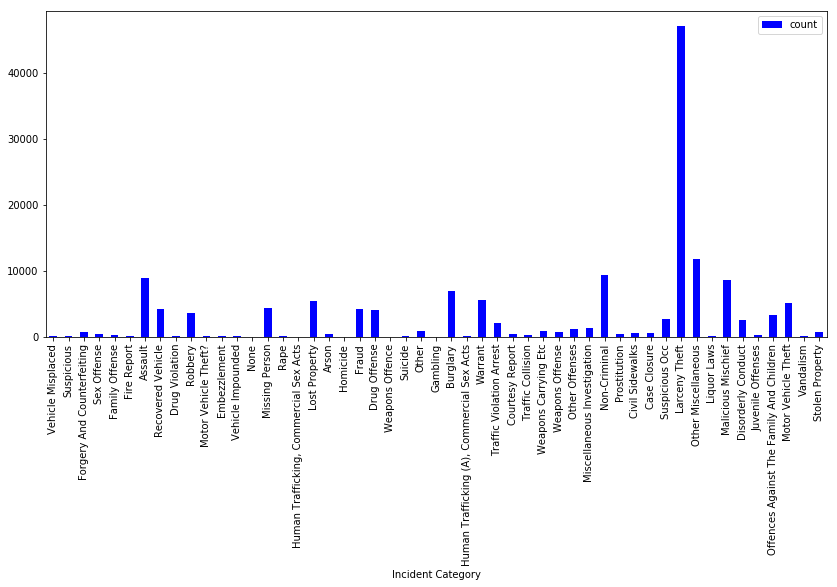

In [25]:
dg.plot(kind="bar", x="Incident Category", y="count", color="blue", figsize=(14, 6))
plt.show()

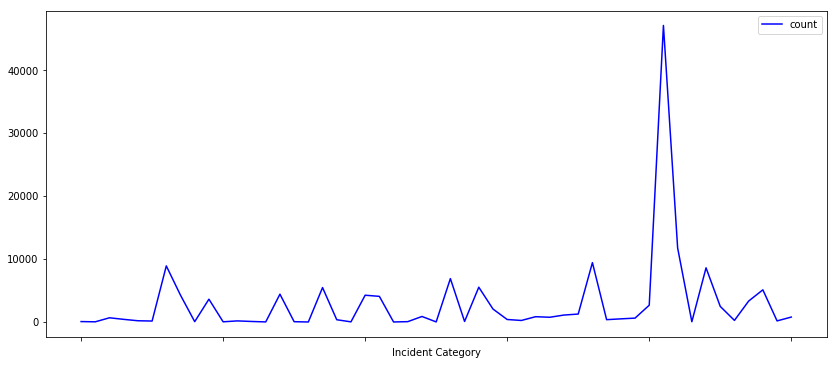

In [26]:
dg.plot(kind="line", x="Incident Category", y="count", color="blue", figsize=(14, 6))
plt.show()

In [27]:
q6=data.select('Police District').groupBy('Police District').count()
q6.show()

+---------------+-----+
|Police District|count|
+---------------+-----+
|        Taraval|10569|
|      Ingleside|10706|
|       Southern|19704|
|       Northern|18650|
|        Bayview|12025|
|        Mission|20983|
|        Central|23945|
|     Tenderloin|15083|
|           Park| 7136|
|      Out of SF| 3787|
|       Richmond| 8203|
+---------------+-----+



In [28]:
q7=data.select('Incident Category','Police District').groupBy('Incident Category').count()
q7.show()

+--------------------+-----+
|   Incident Category|count|
+--------------------+-----+
|   Vehicle Misplaced|   66|
|          Suspicious|   29|
|Forgery And Count...|  669|
|         Sex Offense|  420|
|      Family Offense|  197|
|         Fire Report|  151|
|             Assault| 8919|
|   Recovered Vehicle| 4259|
|      Drug Violation|   54|
|             Robbery| 3626|
|Motor Vehicle Theft?|   30|
|        Embezzlement|  175|
|   Vehicle Impounded|   84|
|                null|   12|
|      Missing Person| 4423|
|                Rape|   46|
|Human Trafficking...|    3|
|       Lost Property| 5475|
|               Arson|  359|
|            Homicide|   22|
+--------------------+-----+
only showing top 20 rows



In [29]:
q9=data.select('Incident Category',).groupBy('Incident Category').count() where('Police District'='Southern')
q9.show()

SyntaxError: invalid syntax (<ipython-input-29-d2d9f04fe49f>, line 1)

In [ ]:
g1 = q6.toPandas()
g2 = q7.toPandas()

In [ ]:
print(g1)

In [ ]:
print(g2)

In [ ]:
g2.plot(kind="bar", x="Incident Category", y="count", color="blue", figsize=(14, 6))
g1.plot(kind="bar", x="Police District", y="count", color="red", figsize=(14, 6))
plt.legend()
plt.xlabel('category')
plt.ylabel('counts (kms)')
plt.title('Information')
plt.show()

In [ ]:
g2.plot(kind="line", x="Incident Category", y="count", color="blue", figsize=(14, 6))
g1.plot(kind="bar", x="Police District", y="count", color="red", figsize=(14, 6))
plt.xlabel('category')
plt.ylabel('counts (kms)')
plt.title('Information')
plt.show()

In [ ]:
q8=data.select('Incident Category','Police District','Incident Date')
q8.show()

In [ ]:
frames = [g1, g2]
result = pd.concat(frames)
print(result)

In [ ]:
result.plot(kind="bar", x="Incident Category", y="count", color="blue", figsize=(14, 6))
result.plot(kind="bar", x="Police District", y="count", color="red", figsize=(14, 6))

In [30]:
qic=data.select('Incident Category').groupBy('Incident Category').count().show()

+--------------------+-----+
|   Incident Category|count|
+--------------------+-----+
|   Vehicle Misplaced|   66|
|          Suspicious|   29|
|Forgery And Count...|  669|
|         Sex Offense|  420|
|      Family Offense|  197|
|         Fire Report|  151|
|             Assault| 8919|
|   Recovered Vehicle| 4259|
|      Drug Violation|   54|
|             Robbery| 3626|
|Motor Vehicle Theft?|   30|
|        Embezzlement|  175|
|   Vehicle Impounded|   84|
|                null|   12|
|      Missing Person| 4423|
|                Rape|   46|
|Human Trafficking...|    3|
|       Lost Property| 5475|
|               Arson|  359|
|            Homicide|   22|
+--------------------+-----+
only showing top 20 rows



In [31]:
qic=data.select('Police District','Incident ID').show()

+---------------+-----------+
|Police District|Incident ID|
+---------------+-----------+
|        Mission|     710380|
|      Out of SF|     718076|
|        Mission|     744364|
|       Northern|     731834|
|      Out of SF|     744413|
|       Southern|     718315|
|       Southern|     718332|
|        Central|     731873|
|     Tenderloin|     731914|
|           Park|     744524|
|        Central|     718428|
|       Southern|     718505|
|       Southern|     744651|
|        Mission|     744658|
|       Northern|     744656|
|     Tenderloin|     744666|
|       Southern|     744653|
|        Central|     744652|
|        Mission|     744658|
|        Central|     732069|
+---------------+-----------+
only showing top 20 rows



In [32]:
data.select(data['Police District'], data['Incident ID'] ).show()

+---------------+-----------+
|Police District|Incident ID|
+---------------+-----------+
|        Mission|     710380|
|      Out of SF|     718076|
|        Mission|     744364|
|       Northern|     731834|
|      Out of SF|     744413|
|       Southern|     718315|
|       Southern|     718332|
|        Central|     731873|
|     Tenderloin|     731914|
|           Park|     744524|
|        Central|     718428|
|       Southern|     718505|
|       Southern|     744651|
|        Mission|     744658|
|       Northern|     744656|
|     Tenderloin|     744666|
|       Southern|     744653|
|        Central|     744652|
|        Mission|     744658|
|        Central|     732069|
+---------------+-----------+
only showing top 20 rows



In [33]:
data.createGlobalTempView("people")

In [34]:
a=spark.sql("SELECT * FROM global_temp.people")
a.show()

+--------------------+-------------+-------------+-------------+--------------------+--------------------+-----------+-----------+---------------+----------+----------------+-----------------------+------------+-------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------+---------------+---------------------+-------------------+------------------+-------------------+--------------------+---------------------+------------------------+----------------------------+----------------------+---------------------------+------------------+
|   Incident Datetime|Incident Date|Incident Time|Incident Year|Incident Day of Week|     Report Datetime|     Row ID|Incident ID|Incident Number|CAD Number|Report Type Code|Report Type Description|Filed Online|Incident Code|  Incident Category|Incident Subcategory|Incident Description|          Resolution|        Intersection|     CNN|Police District|Analysis Neighborhood|Supervisor District| 

In [35]:
data.printSchema()

root
 |-- Incident Datetime: string (nullable = true)
 |-- Incident Date: string (nullable = true)
 |-- Incident Time: string (nullable = true)
 |-- Incident Year: integer (nullable = true)
 |-- Incident Day of Week: string (nullable = true)
 |-- Report Datetime: string (nullable = true)
 |-- Row ID: long (nullable = true)
 |-- Incident ID: integer (nullable = true)
 |-- Incident Number: integer (nullable = true)
 |-- CAD Number: integer (nullable = true)
 |-- Report Type Code: string (nullable = true)
 |-- Report Type Description: string (nullable = true)
 |-- Filed Online: boolean (nullable = true)
 |-- Incident Code: integer (nullable = true)
 |-- Incident Category: string (nullable = true)
 |-- Incident Subcategory: string (nullable = true)
 |-- Incident Description: string (nullable = true)
 |-- Resolution: string (nullable = true)
 |-- Intersection: string (nullable = true)
 |-- CNN: decimal(8,0) (nullable = true)
 |-- Police District: string (nullable = true)
 |-- Analysis Neigh

In [36]:
people.printSchema()

NameError: name 'people' is not defined

In [ ]:
cols=['Incident Category','Police District','Incident Date']

In [ ]:
data.select(cols).describe().show()

In [ ]:
g2.plot(kind="line", x="Incident Category", y="count", color="blue", figsize=(14, 6))
g1.plot(kind="bar", x="Police District", y="count", color="red", figsize=(14, 6))
plt.xlabel('category')
plt.ylabel('counts (kms)')
plt.title('Information')
plt.show()

In [37]:
spark.sql("SELECT `Incident Category`,COUNT(*) from global_temp.people GROUP BY (`Incident Category`)").show()

+--------------------+--------+
|   Incident Category|count(1)|
+--------------------+--------+
|   Vehicle Misplaced|      66|
|          Suspicious|      29|
|Forgery And Count...|     669|
|         Sex Offense|     420|
|      Family Offense|     197|
|         Fire Report|     151|
|             Assault|    8919|
|   Recovered Vehicle|    4259|
|      Drug Violation|      54|
|             Robbery|    3626|
|Motor Vehicle Theft?|      30|
|        Embezzlement|     175|
|   Vehicle Impounded|      84|
|                null|      12|
|      Missing Person|    4423|
|                Rape|      46|
|Human Trafficking...|       3|
|       Lost Property|    5475|
|               Arson|     359|
|            Homicide|      22|
+--------------------+--------+
only showing top 20 rows



In [38]:
mydata = spark.sql("SELECT `Incident Category`,COUNT(*) from global_temp.people  where `Police District`='Tenderloin' GROUP BY (`Incident Category`)")

In [39]:
mydata.show()

+--------------------+--------+
|   Incident Category|count(1)|
+--------------------+--------+
|   Vehicle Misplaced|       5|
|Forgery And Count...|      55|
|         Sex Offense|      34|
|      Family Offense|      10|
|         Fire Report|      11|
|             Assault|    1339|
|   Recovered Vehicle|     235|
|      Drug Violation|      17|
|             Robbery|     568|
|Motor Vehicle Theft?|       2|
|        Embezzlement|      22|
|   Vehicle Impounded|       3|
|      Missing Person|     296|
|                Rape|       6|
|       Lost Property|     513|
|               Arson|      42|
|               Fraud|     279|
|            Homicide|       3|
|        Drug Offense|    1853|
|     Weapons Offence|       1|
+--------------------+--------+
only showing top 20 rows



In [40]:
g = mydata.toPandas()

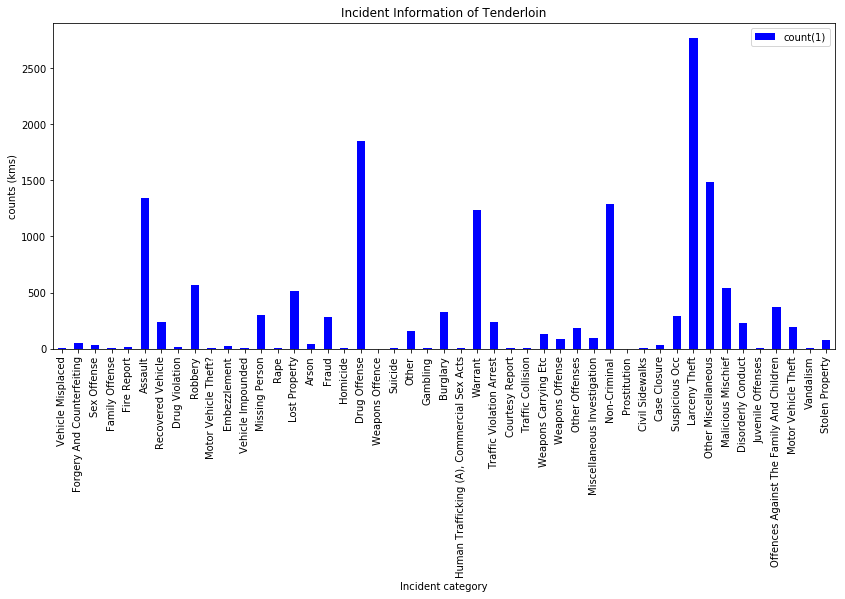

In [41]:
g.plot(kind="bar", x="Incident Category", y="count(1)", color="blue", figsize=(14, 6))
plt.xlabel('Incident category')
plt.ylabel('counts (kms)')
plt.title('Incident Information of Tenderloin')
plt.show()